## KMeans e Árvore de decisão no Reconhecimento de padrões em dados experimentais de solos

Aplicação dos algoritmos visa agrupar e classificar regiões que apresentem resultados de produtividade similares com base na produção de (Milho, Soja, Girassol e Trigo) entre os anos de 2005 e 2010, buscando maximizar os resultados da acurácia na identificação de amostras;

A base de conhecimento possui instâncias originadas de amostra de solos catalogados em diferentes regiões do estado do Rio Grande do Sul. 
       
__Premissas:__
* Por pré-definição foram considerados K = 5 e K = 10;
* As colunas colunas para treino e teste foram: 'Cota do centro da UEO (mm)', 'Milho_2005_2006', 'Soja_2006_2007', 'Milho_2007_2008', 'Girassol_2008_2009', 'Trigo_2009_2009', 'Milho_2009_2010';
* A coluna 'E' fornecida, bem como os resultados do KMeans com K = 5 e K = 10 foram utilizados como rótulo de dados para a árvore de decisão;
* Os dados foram padronizados para a análise.

### Preparação dos dados

In [70]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('dados_experimentais_de_solos_normalized.csv', index_col='IDE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 1 to 274
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cota do centro da UEO (mm)  262 non-null    float64
 1   E                           262 non-null    int64  
 2   Milho_2005_2006             262 non-null    float64
 3   Soja_2006_2007              262 non-null    float64
 4   Milho_2007_2008             262 non-null    float64
 5   Girassol_2008_2009          262 non-null    float64
 6   Trigo_2009_2009             262 non-null    float64
 7   Milho_2009_2010             262 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.4 KB


In [71]:
df.head().T

IDE,1,2,3,4,5
Cota do centro da UEO (mm),0.975716,0.976644,0.934905,0.896876,0.866268
E,0.000000,0.000000,0.000000,0.000000,0.000000
Milho_2005_2006,0.427229,0.488838,0.477369,0.912469,1.039452
Soja_2006_2007,0.714782,0.989583,0.787274,0.992733,0.972472
Milho_2007_2008,0.776433,0.891013,0.768873,0.959792,0.944256
Girassol_2008_2009,0.769133,0.661117,0.710965,0.958322,1.113248
Trigo_2009_2009,0.357955,0.770408,0.694187,0.511383,-0.191873
Milho_2009_2010,0.380317,0.428328,0.746549,0.705090,0.341928


__Análise da distribuição dos dados__

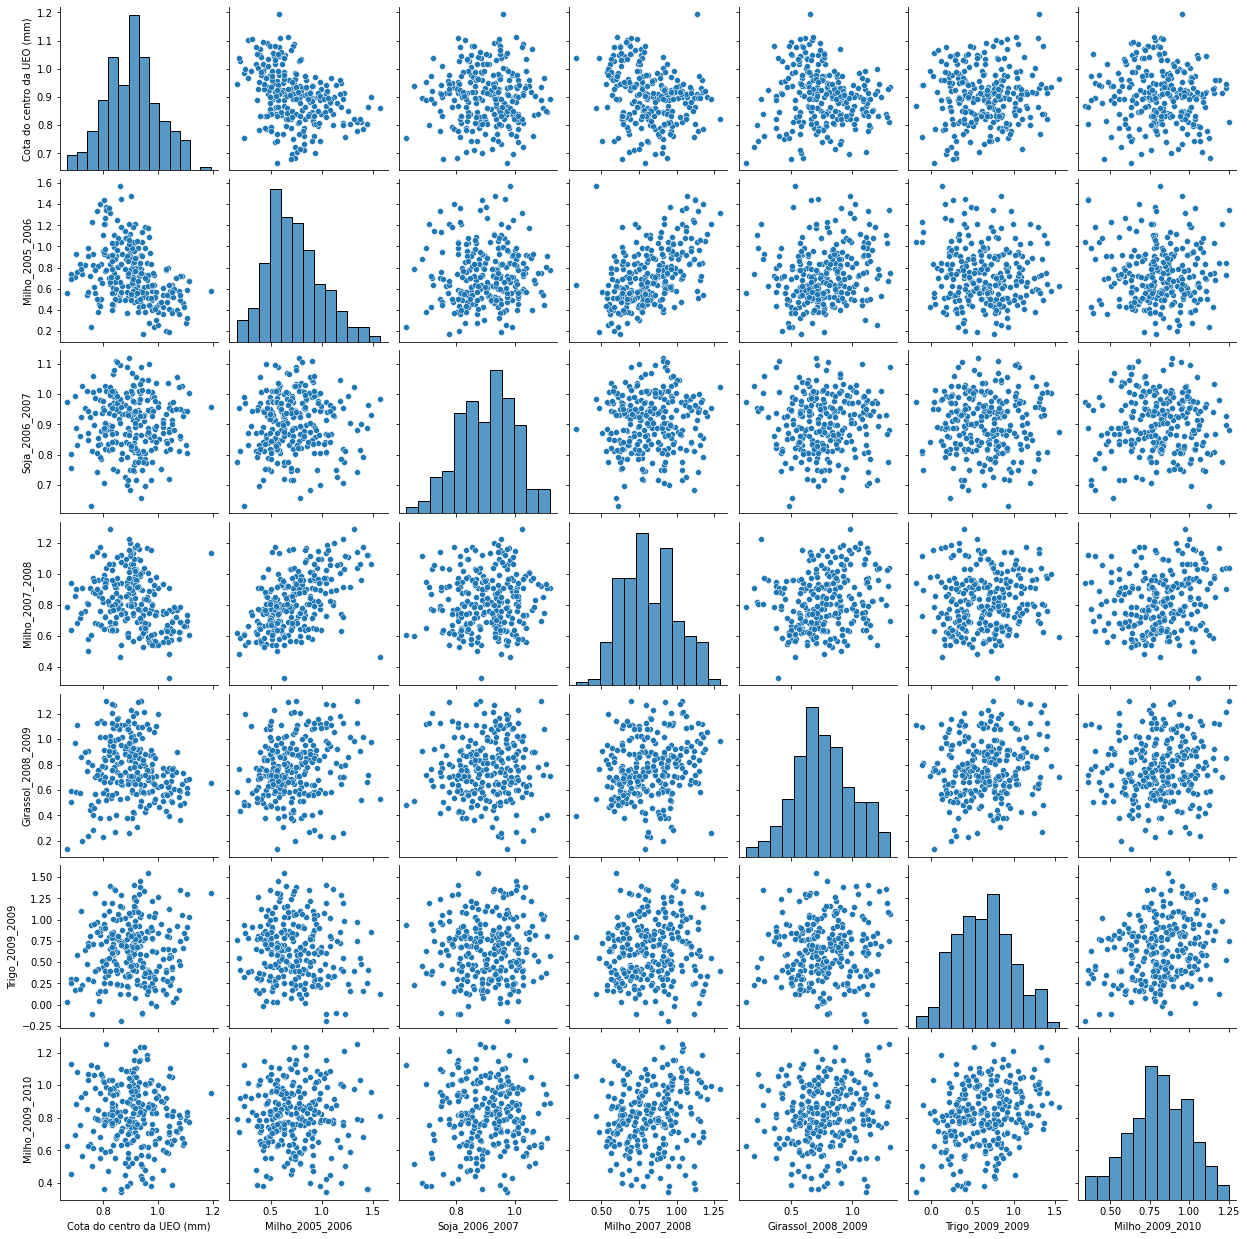

In [72]:
sns.pairplot(df.drop('E', axis=1))

### Treino do modelo KMeans com K = 5

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random')

X = np.array(df.drop('E', axis=1))

kmeans.fit(X)

KMeans(init='random', n_clusters=5)

__definição da distância das instâncias aos clusters e rótulos para cada instância__

In [74]:
kmeans.cluster_centers_

distance = kmeans.fit_transform(X)

labels = kmeans.labels_

__predição dos clusters__

In [75]:
kmeans_prediction = kmeans.predict(X)
df["Predicted_5"] = kmeans_prediction

__Observação dos clusters e centróides__


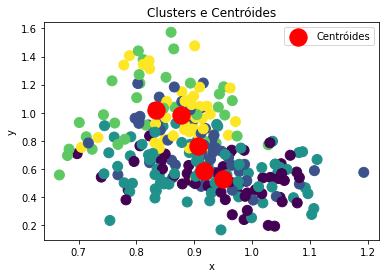

In [77]:
plt.scatter(X[:,0], X[:,1], s=100, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red',label='Centróides')
plt.title('Clusters e Centróides')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Treino do modelo KMeans com K = 10

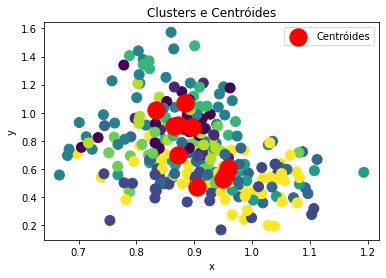

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, init='random') #random_state=50

X = np.array(df.drop('E', axis=1))

kmeans.fit(X)

kmeans.cluster_centers_

distance = kmeans.fit_transform(X)

labels = kmeans.labels_

kmeans_prediction = kmeans.predict(X)
df["Predicted_10"] = kmeans_prediction

plt.scatter(X[:,0], X[:,1], s=100, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red',label='Centróides')
plt.title('Clusters e Centróides')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

__Análise para entender se o valor de K foi o ideal:__ plot do atributo _inertia_ que corresponde ao somatório dos erros quadráticos das instâncias de cada cluster para verificar o Elbow e encontrar o valor ideal do parâmetro K

1 554.2031218247425
2 221.64452829721748
3 107.75414729621518
4 68.8529899696152
5 44.37733785677661
6 42.184227261748326
7 40.731407071267135
8 38.63934690446629
9 36.70897098565848
10 35.48507118400267


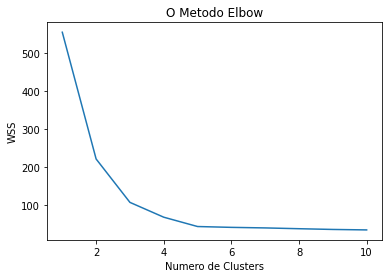

In [79]:
wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

### Modelo Árvore de Decisão com rótulo da coluna 'E'

__Separação dos dados de treino e teste:__ 30% da base para teste e 70% para treino

In [80]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x = df.drop(columns=['E','Predicted_5','Predicted_10'])
y = df['E']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

__Treino do modelo__

In [81]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy")

decision_tree = decision_tree.fit(x_train,y_train)

__Verificação das features consideradas mais importantes__

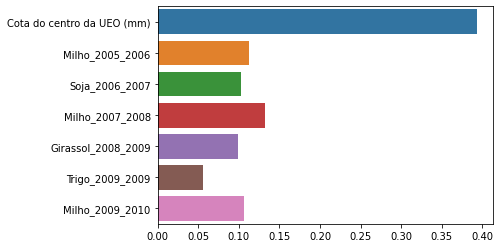

In [82]:
sns.barplot(y=x_train.columns, x=decision_tree.feature_importances_)
plt.show()

__Predição do modelo__

In [83]:
decision_tree_prediction = decision_tree.predict(x_test)

__Matriz de confusão__

In [84]:
display(pd.crosstab(y_test,decision_tree_prediction, rownames=['Real'], colnames=['Predicted'], margins=True))

Predicted,0,1,2,3,4,5,6,7,9,All
Real,,,,,,,,,,
0,1,1,0,0,0,1,0,1,0,4
1,1,4,0,2,0,0,0,0,0,7
2,1,0,3,0,0,0,0,1,0,5
3,0,0,0,1,5,0,0,1,0,7
4,0,1,0,7,5,2,1,0,0,16
5,0,0,0,0,0,4,4,0,1,9
6,1,0,0,0,0,4,2,1,1,9
7,0,2,1,1,0,0,3,5,0,12
9,0,0,0,0,0,2,0,2,6,10


__Report da classificação da árvore de decisão__

In [85]:
print(metrics.classification_report(y_test,decision_tree_prediction))

              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.50      0.57      0.53         7
           2       0.75      0.60      0.67         5
           3       0.09      0.14      0.11         7
           4       0.50      0.31      0.38        16
           5       0.31      0.44      0.36         9
           6       0.20      0.22      0.21         9
           7       0.45      0.42      0.43        12
           9       0.75      0.60      0.67        10

    accuracy                           0.39        79
   macro avg       0.42      0.40      0.40        79
weighted avg       0.44      0.39      0.41        79



### Modelo Árvore de Decisão com rótulo do KMeans com K = 10

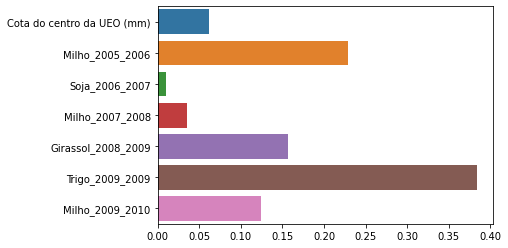

Predicted,0,1,2,3,4,5,6,7,8,9,All
Real,,,,,,,,,,,
0,4,0,0,2,0,0,0,0,0,0,6
1,0,2,0,0,0,0,0,0,1,0,3
2,0,0,4,0,0,0,0,1,0,0,5
3,2,0,0,8,0,1,0,1,0,1,13
4,2,0,0,0,5,0,0,1,0,1,9
5,0,0,0,0,0,3,0,0,1,0,4
6,3,0,0,0,2,0,1,0,0,0,6
7,0,0,0,3,0,0,0,3,0,0,6
8,0,1,0,0,0,0,0,0,2,0,3


              precision    recall  f1-score   support

           0       0.36      0.67      0.47         6
           1       0.67      0.67      0.67         3
           2       1.00      0.80      0.89         5
           3       0.62      0.62      0.62        13
           4       0.50      0.56      0.53         9
           5       0.75      0.75      0.75         4
           6       1.00      0.17      0.29         6
           7       0.50      0.50      0.50         6
           8       0.50      0.67      0.57         3
           9       0.91      0.88      0.89        24

    accuracy                           0.67        79
   macro avg       0.68      0.63      0.62        79
weighted avg       0.72      0.67      0.67        79



In [86]:
y = df['Predicted_10']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

decision_tree = DecisionTreeClassifier(criterion="entropy")

decision_tree = decision_tree.fit(x_train,y_train)

sns.barplot(y=x_train.columns, x=decision_tree.feature_importances_)
plt.show()

decision_tree_prediction = decision_tree.predict(x_test)

display(pd.crosstab(y_test,decision_tree_prediction, rownames=['Real'], colnames=['Predicted'], margins=True))

print(metrics.classification_report(y_test,decision_tree_prediction))

### Modelo Árvore de Decisão com rótulo do KMeans com K = 5

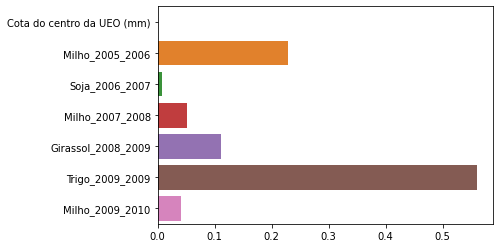

Predicted,0,1,2,3,4,All
Real,,,,,,
0,15,0,0,0,2,17
1,0,13,2,0,0,15
2,0,2,20,0,2,24
3,3,0,0,10,0,13
4,0,0,0,3,7,10
All,18,15,22,13,11,79


              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.87      0.87      0.87        15
           2       0.91      0.83      0.87        24
           3       0.77      0.77      0.77        13
           4       0.64      0.70      0.67        10

    accuracy                           0.82        79
   macro avg       0.80      0.81      0.81        79
weighted avg       0.83      0.82      0.82        79



In [87]:
y = df['Predicted_5']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

decision_tree = DecisionTreeClassifier(criterion="entropy")

decision_tree = decision_tree.fit(x_train,y_train)

sns.barplot(y=x_train.columns, x=decision_tree.feature_importances_)
plt.show()

decision_tree_prediction = decision_tree.predict(x_test)

display(pd.crosstab(y_test,decision_tree_prediction, rownames=['Real'], colnames=['Predicted'], margins=True))

print(metrics.classification_report(y_test,decision_tree_prediction))

### Análise do resultado de predição mais expressivo

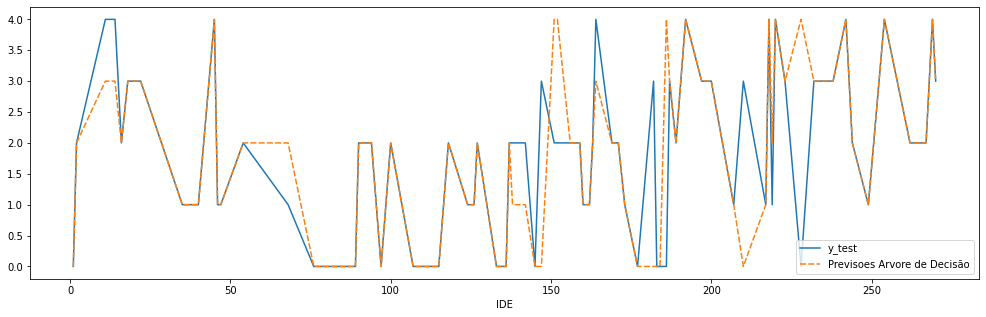

In [88]:
df_aux = pd.DataFrame()
df_aux["y_test"] = y_test
df_aux["Previsoes Arvore de Decisão"] = decision_tree_prediction

plt.figure(figsize=(17,5))
sns.lineplot(data=df_aux)
plt.show()

### Conclusões

* De acordo com o Método Elbow não faria sentido utilizar o parâmetro K superior a 5;
* Na árvore de decisão obteve destaque os resultados com parâmetro originário do KMeans de K = 5.
